In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

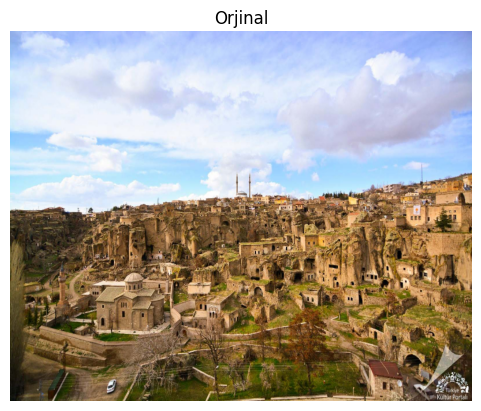

In [2]:
imagine = cv2.imread('aksaray.jpg',1)
# görüntüyü yeniden boyutlandırmaya yarar
imagine2 = cv2.resize(imagine, (800,640))
imagine2_rgb = cv2.cvtColor(imagine2, cv2.COLOR_BGR2RGB)
plt.imshow(imagine2_rgb)
plt.title("Orjinal")
plt.axis("off")
plt.show()

Bu Görsel Aksaraya ait bir görseldir ve bu görsel 800 X 640 çözünürlüğünde yeniden boyutlandırılmıştır.

In [4]:
def gauss_gurultu_ekleme(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype('float32')
    gurultu = np.clip(image + gauss, 0, 255).astype('uint8')
    return gurultu

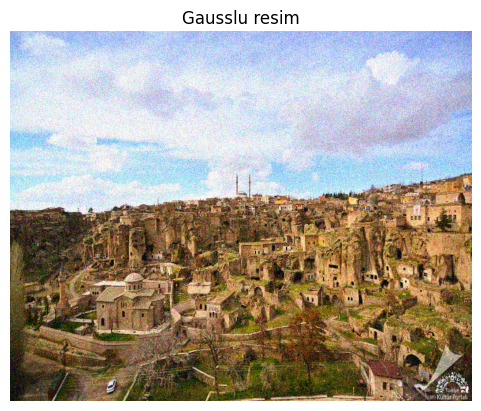

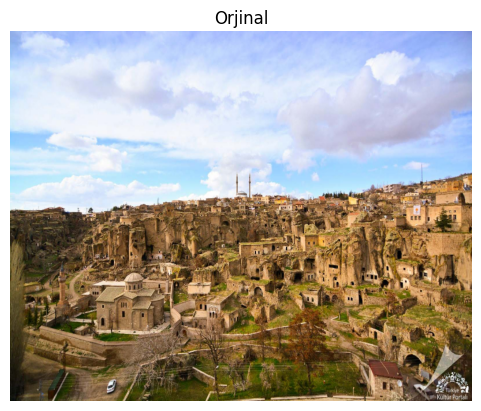

In [5]:
#resime gauss gürültüsü ekler
gausslu_resim =gauss_gurultu_ekleme(imagine2)
gausslu_resim_rgb = cv2.cvtColor(gausslu_resim, cv2.COLOR_BGR2RGB)
plt.imshow(gausslu_resim_rgb)
plt.title("Gausslu resim")
plt.axis("off")
plt.show()

plt.imshow(imagine2_rgb)
plt.title("Orjinal")
plt.axis("off")
plt.show()

Gauss orjinal resimin piksellerini rastgele şekilde değerler almasına denir. Mean(Ortalama) gürültünün ortalaması demektir ve 0 dan farklı olması durumunda piksellerin parlaklığı değişir. Sigma değeri ise gürültü şiddetidir ve değer arttıkça gürültü şiddeti artar ve resim gittikçe anlamsızlaşır.
Gauss dağılımı -∞ ile +∞ arasında değerler üretir ve sigma ve mean değerleri teorik olarak sonsuz değerler alabilir ancak genelde mean -30 ve +30 arası değerler alırken sigma 5 ile 50 arası değerler alır.
İmage.shape kodu resimin yükseklik genişlik ve kanal sayısı değerlerini verir. 
np.clip resimde rastgele bir şekilde gürültü oluşmasını sağlar ve Unit8 resim formatında bilgisayarda tutulması için 0 altı pixel değerleri 0 255 üstü pixel değerlerini ise 255 yapar.  

In [6]:
def tuz_biber_gurultu_ekleme(image, salt_prob=0.02, pepper_prob=0.02):
    gurultu = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]

    # Salt (beyaz) pikseller
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i, num_salt) for i in image.shape[:2]]
    gurultu[coords[0], coords[1]] = 255

    # Pepper (siyah) pikseller
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape[:2]]
    gurultu[coords[0], coords[1]] = 0

    return gurultu

Tuz_Biber gürültüsü rastgele şekilde piksellerin siyah beyaz oluşması ile meydana gelir. salt_prob ve pepper_prob oranları resimde % kaç oranında gürültü oluşturacağını belirtir. coords değişkeni sayesinde rastgele kordinatlar üretiliyor ve o belirlenen kordinatlar siyah veya beyaza dönüştürüyoruz. 
imagine.shape[:2]= Yükseklik,genişlik

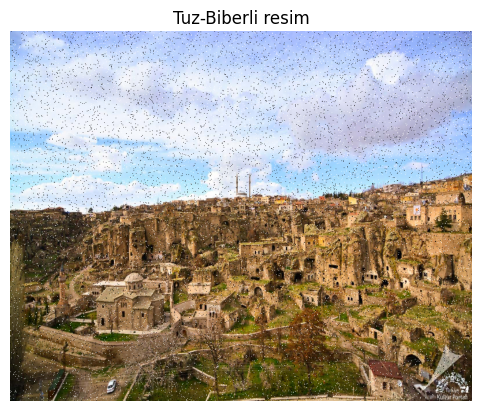

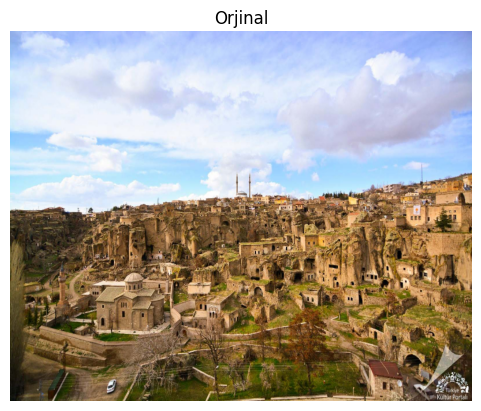

In [7]:
#resime tuz-biber eklemeye yarar
tuz_biber_resim = tuz_biber_gurultu_ekleme(imagine2)
tuz_biber_resim_rgb = cv2.cvtColor(tuz_biber_resim, cv2.COLOR_BGR2RGB)
plt.imshow(tuz_biber_resim_rgb)
plt.title("Tuz-Biberli resim")
plt.axis("off")
plt.show()

plt.imshow(imagine2_rgb)
plt.title("Orjinal")
plt.axis("off")
plt.show()

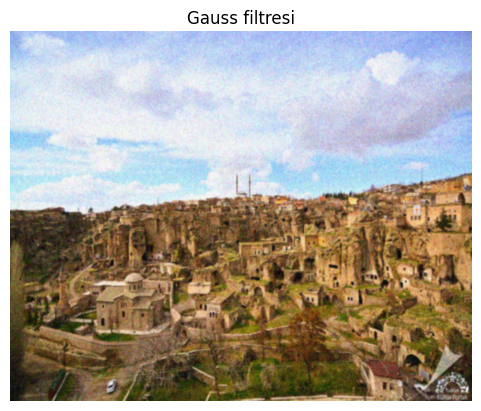

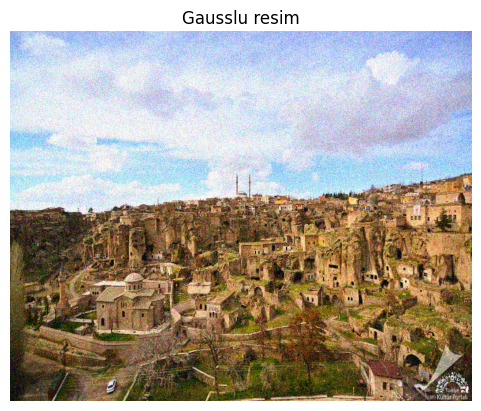

In [8]:
#gauss filtresi sayesinde gauss gürültüsünü filtreler 
gauss_filtresi = cv2.GaussianBlur(gausslu_resim,(5,5),1)
gauss_filtresi_rgb = cv2.cvtColor(gauss_filtresi, cv2.COLOR_BGR2RGB)
plt.imshow(gauss_filtresi_rgb)
plt.title("Gauss filtresi")
plt.axis("off")
plt.show()

plt.imshow(gausslu_resim_rgb)
plt.title("Gausslu resim")
plt.axis("off")
plt.show() 

Gauss filtresi aldığı parametreye göre resimden Gauss çekirdekleri çıkarır ve piksellerin değerlerinin ağırlık ortalamasını dağıtır "bunu tüm göreselin piksellerine uğrayarak yapar" böylece detaylar kaybolur ve görüntü bulanıklaşır. Yukarıdaki koda göre "gauss_filtresi = cv2.GaussianBlur(gausslu_resim,(5,5),1)" parametremiz (5,5) ve standart sapmamız 1 dir standart sapma merkez sayısı ve bu merkeze göre bulanıklaştırma gibi düşünebiliriz yani merkeze ne kadar bağlı kalacağını, kenar piksellerin ne kadar etkili olacağını standart sapma kontrol eder.

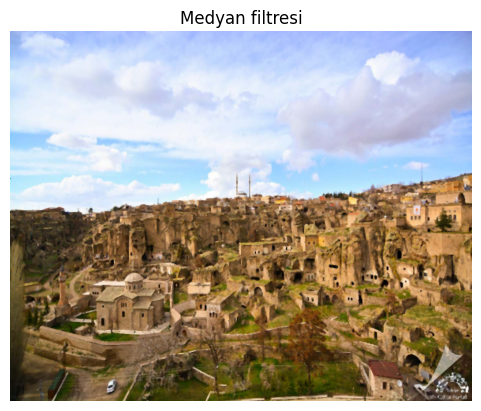

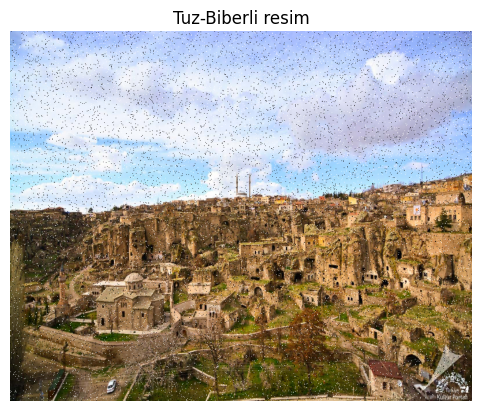

In [9]:
#ortalama filtresi sayesinde tuz-biber gürültüsünü filtreler 
medyan_filtresi = cv2.medianBlur(tuz_biber_resim,3)
medyan_filtresi_rgb = cv2.cvtColor(medyan_filtresi, cv2.COLOR_BGR2RGB)
plt.imshow(medyan_filtresi_rgb)
plt.title("Medyan filtresi")
plt.axis("off")
plt.show()

plt.imshow(tuz_biber_resim_rgb)
plt.title("Tuz-Biberli resim")
plt.axis("off")
plt.show()

Medyan filtresi "medyan_filtresi = cv2.medianBlur(tuz_biber_resim,3)" aldığı parametreye göre resimden matrisi alır "bunu tüm göreselin piksellerine uğrayarak" ve matris değerleri sıralar ve medyan değere sahip değeri matrisin merkez değerinin üzerine yazar . Yukarıdaki kodda parametremiz 3'tür.
Bu parametreler tek sayı olmak zorundadır çünkü parametreye göre oluşacak matrisin merkez bir pikseli bulunmalıdır. Görseldeki keskin değerleri yok eder ve görseldeki detayları korur. Ancak bu filtreleme yönteminde kenar piksel problemi vardır ve bu sorun kenar doldurma yöntemi ile openCV olmayan pikselleri uydurur ve ona göre medianBlur uygular bu yönteme ise padding(kenar doldurma) yöntemi denir.


1 3 5

4 255 9

2 6 7

In [ ]:
def cift_katmanlı_hibrid_filtreleme(image):
    ilk_katman=cv2.medianBlur(image,3)
    ilk_katman_rgb = cv2.cvtColor(ilk_katman, cv2.COLOR_BGR2RGB)
    plt.imshow(ilk_katman_rgb)
    plt.title("Ilk katman medyan filtresi uygulanıyor")
    plt.axis("off")
    plt.show()

    ikinci_katman=cv2.GaussianBlur(ilk_katman,(5,5),1)
    ikinci_katman_rgb = cv2.cvtColor(ikinci_katman, cv2.COLOR_BGR2RGB)
    plt.imshow(ikinci_katman_rgb)
    plt.title("Ikinci katman Gauss filtresi uygulanıyor")
    plt.axis("off")

    return plt.show()


In [ ]:
def cift_katmanlı_hibrid_filtreleme_katmanlari_degistir(image):
    ilk_katman=cv2.GaussianBlur(image,(5,5),1)
    ilk_katman_rgb = cv2.cvtColor(ilk_katman, cv2.COLOR_BGR2RGB)
    plt.imshow(ilk_katman_rgb)
    plt.title("Ilk katman Gauss Filtresi kullanılırsa")
    plt.axis("off")
    plt.show()

    ikinci_katman=cv2.medianBlur(ilk_katman,3)
    ikinci_katman_rgb = cv2.cvtColor(ikinci_katman, cv2.COLOR_BGR2RGB)
    plt.imshow(ikinci_katman_rgb)
    plt.title("Ikinci katman Tuz-Biber kullanılırsa")
    plt.axis("off")

    return plt.show()

In [ ]:
#tuz-biber gürültüsü ekleyen fonksiyona gauss gürültülü resim göndermeye yarar
gurultu_karısımı = tuz_biber_gurultu_ekleme(gauss_gurultu_ekleme(imagine2))
gurultu_karısımı_rgb = cv2.cvtColor(gurultu_karısımı, cv2.COLOR_BGR2RGB)
plt.imshow(gurultu_karısımı_rgb)
plt.title("Tuz-Biber Ve Gauss")
plt.axis("off")
plt.show()

In [ ]:
gurultu_karısımı_filtreleme=cift_katmanlı_hibrid_filtreleme(gurultu_karısımı)
gurultu_karısımı_filtreleme=cift_katmanlı_hibrid_filtreleme_katmanlari_degistir(gurultu_karısımı)

In [ ]:
key=cv2.waitKey()
if key ==ord("q"):
     quit() 